In [31]:
from PIL import Image, ImageDraw

In [48]:
def binarize(image, thre):
    img = Image.open(image).convert("L")
    width, height = img.size
    for x in range(0, width):
        for y in range(0, height):
            avg = img.getpixel((x, y))
            #avg = (r + g + b) / 3        # get the pixel and average all of them
            if avg > thre:        # if > threshold, set to  1 else set to 0
                avg = 255
            else:
                avg = 0
            img.putpixel((x, y), avg)
    #img = Image.open(name)
    #img = img.convert("1")
    pic_name = "binarized1.jpg"
    img.save(pic_name)
    return pic_name


In [27]:
def bounded_box(image):
    img = Image.open(image)
    width, height = img.size
    left = width
    right = 0
    top = height
    bottom = 0
    for x in range(0,width):
        for y in range(0,height):
            color = img.getpixel((x,y))
            if color is 0:
                if x > right:
                    right = x
                if x < left:
                    left = x
                if y > bottom:
                    bottom = y
                if y < top:
                    top = y
    draw = ImageDraw.Draw(img)
    draw.rectangle(((left, top), (right, bottom)))
    return (img, left, right, top, bottom)

In [37]:
# finding Centroid
def centroid(image, left, right, top, bottom):
    cx = 0
    cy = 0
    n = 0
    for x in range(left,right):
        for y in range(top, bottom):
            if image.getpixel((x,y)) is 0: #If pixel is black
                cx = cx + x
                cy = cy + y
                n = n + 1
    if n == 0:
        return ((left + right) // 2, (top + bottom) // 2)
    else:
        return (cx // n,cy // n)

In [38]:
def segment(img, left, right, top, bottom, cx, cy):
    draw = ImageDraw.Draw(img)
    draw.rectangle(((left,top),(cx,cy)))
    draw.rectangle(((left,cy),(cx,bottom)))
    draw.rectangle(((cx,top),(right,cy)))
    draw.rectangle(((cx,cy),(right,bottom)))
    img.show()
    img.save("rect1.png")

In [49]:
pic_name = binarize("img2.png", 25)
p_name, left, right, top, bottom = bounded_box(pic_name)
cx, cy = centroid(p_name, left, right, top, bottom)
segment(p_name, left, right, top, bottom, cx, cy)



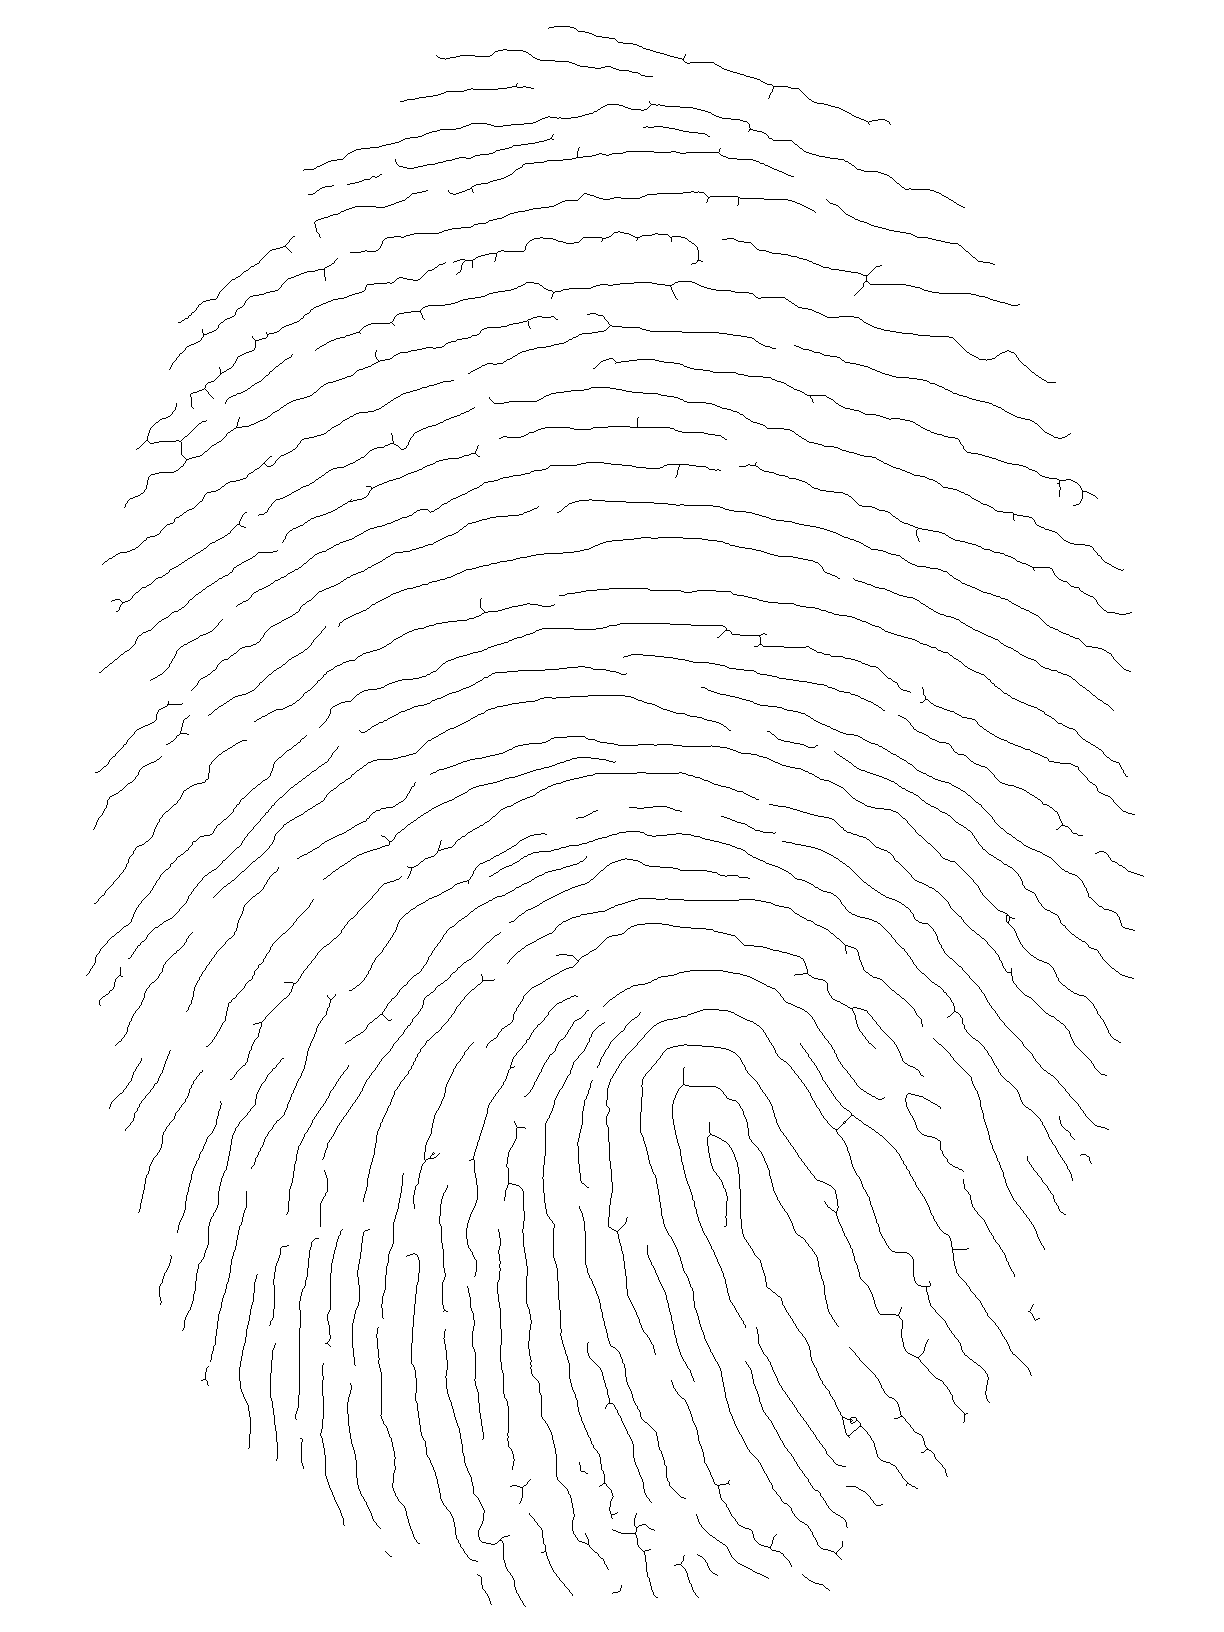

In [57]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert
import numpy as np

# Invert the horse image
im = Image.open("img1.png").convert("L")
arr = np.asarray(im)
image = invert(arr)
# perform skeletonization
skeleton = skeletonize(np.clip(image,0,1))
skel=invert(skeleton)
img=(Image.fromarray(np.uint8(skel)*255))
display(img)
img.save("skeleton.png")